# Protection of clients personal data

We need to protect the data of the insurance company's customers. To do this, we will develop such a method of data transformation so that it would be difficult to recover personal information from them. We will justify the correctness of his work.

It is necessary to protect the data so that the quality of machine learning models does not decrease during the conversion.

## Open data

Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/a1/Desktop/data_folder/insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [5]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Primary data analysis showed that we need:
* change the name of the columns.

In [6]:
df.rename(columns = {'Пол' : 'sex', 'Возраст' : 'age', 'Зарплата': 'salary', 'Члены семьи': 'family_members', 'Страховые выплаты':'insurance_payment'}, inplace = True)
df.head()

,sex,age,salary,family_members,insurance_payment
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Let's check the possibility of a quality-safe transformation of value types from float to int:

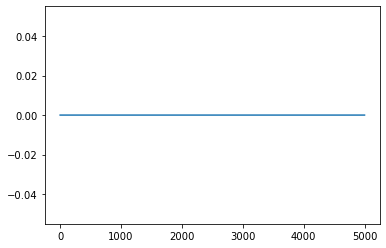

In [7]:
age = df['age'].values % 1
plt.plot(age)

In [8]:
salary = df['salary'].values % 1
salary

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       0.00000000e+00, 3.63797881e-12, 0.00000000e+00])

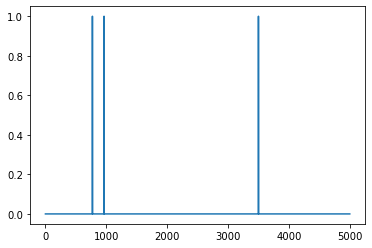

In [9]:
plt.plot(salary)

Transform the type of values in the columns age and salary from float to int.

In [10]:
df['age'] = df['age'].astype(int)
df['salary'] = df['salary'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                5000 non-null   int64
 1   age                5000 non-null   int64
 2   salary             5000 non-null   int64
 3   family_members     5000 non-null   int64
 4   insurance_payment  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


Let's study data through the function describe:

In [11]:
df.describe()

,sex,age,salary,family_members,insurance_payment
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Check the values correlation:

<AxesSubplot:>

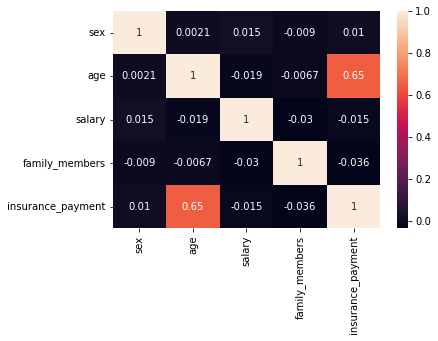

In [12]:
sns.heatmap(df.corr(), annot = True) 

The correlation between the features is weak, the data are distributed normally.

Let's devide the dataframe to features and target:

In [13]:
target = df['insurance_payment']
features = df.drop('insurance_payment', axis=1)

## Matrix multiplication

- $X$ — features matrix (null column consist of 1 values)

- $y$ — vector of the target feature

- $P$ — the matrix by which the features are multiplied

- $w$ — linear regression weight vector (zero element equals shift)

Predictions:

$$
a = Xw
$$

Training task:

$$
w = \arg\min_w MSE(Xw, y)
$$

Training formula:

$$
w = (X^T X)^{-1} X^T y
$$

### **Question:** 
The features are multiplied by a reversible matrix. Will the quality of linear regression change? (It can be re-trained)
- a. It will change. Provide matrix examples.
- b. It won't change. Specify how the linear regression parameters are related in the original problem and in the transformed one.

### Investigation of the question:

Let's name as P - an invertible matrix to the matrix X.

#### Check the training formula:

$$
w' = (X^T X)^{-1} X^T y = ((XP)^T XP)^{-1} (XP)^T y = 
$$

$$
= (P^T (X^T X) P)^{-1} P^T X^T y =
$$

$$
= P^{-1} (P^T (X^T X))^{-1} P^T X^T y =
$$

$$
= ((X^T X) P)^{-1} (P^T)^{-1} P^T X^T y =
$$

$$
= P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = 
$$

and since the Identity matrix is
$$
AA^{-1} = A^{-1}A = E     
$$

то 

$$
w' = P^{-1} (X^T X)^{-1}  E X^T y =
$$

$$
= P^{-1} E w = w'
$$

because of 

$$
w = (X^T X)^{-1} X^T y
$$  

#### Check the prediction formula: 

$$
a' = XP (P)^{-1} w 
$$

$$
a' = XE w = Xw = a
$$

### **Answer:** 
The quality of linear regression will not change if the features are multiplied by an invertible matrix

## Conversion algorithm

**Algorithm**

Thus, the conversion algorithm consists of the following steps:

* 1) generating a random square matrix in size equal to the number of features - this will be the encryption key;

* 2) checking it for reversibility;

* 3) multiplication of features by a random square matrix in size equal to the number of features (per encryption key);

* 4) by restoring features by multiplying the result of step #3 by the inverse matrix of a random square matrix.

**Explanation**

This algorithm is correct because the quality of linear regression will not change and, if necessary, the features can be restored to their original state.

## Checking the algorithm

Let's check the quality of linear regression on the features before multiplying them by an invertible matrix. 

In [14]:
model = LinearRegression().fit(features, target)
predictions = model.predict(features)
print('r2:', r2_score(target, predictions))

r2: 0.42494550308169177


Generate a random square matrix in size equal to the number of features:

In [15]:
random_sqrt_matrix = np.random.normal(size = (4,4))
random_sqrt_matrix

array([[ 1.05999745, -0.08367543, -1.30514872, -0.64843058],
       [ 1.38140356, -1.23208579,  0.64430556, -0.58693686],
       [-0.47743721,  0.57834229, -0.7589017 ,  2.21838456],
       [-0.72246874, -0.7390787 , -0.2769839 , -0.23841417]])

Let's check it for reversibility:

In [16]:
invert_random_sqrt_matrix = np.linalg.inv(random_sqrt_matrix)
invert_random_sqrt_matrix

array([[ 0.21379984,  0.33114617,  0.09627388, -0.50090881],
       [ 0.0332372 , -0.47032737, -0.19246231, -0.72334186],
       [-0.5241553 ,  0.17331521, -0.14415107, -0.3423843 ],
       [-0.14196313,  0.25317563,  0.47236054, -0.03635499]])

Let's check the quality of the model on encrypted data:

In [17]:
new_features = features.values @ random_sqrt_matrix
new_features

array([[-23623.91044691,  28634.43906473, -37616.68984179,
        110006.9228061 ],
       [-18079.79181269,  21919.59180513, -28808.90346467,
         84271.37568296],
       [ -9986.12066682,  12109.45749718, -15918.25080369,
         46569.0545428 ],
       ...,
       [-16158.93822072,  19579.68358849, -25714.43542994,
         75191.02094064],
       [-15582.91323519,  18882.38592077, -24804.04691346,
         72526.89875291],
       [-19344.9338203 ,  23445.37561496, -30794.9505291 ,
         90049.09196597]])

In [18]:
model = LinearRegression().fit(new_features, target)
predictions = model.predict(new_features)
print('r2:', r2_score(target, predictions))

r2: 0.42494550308169743


Let's restore the features to check the quality of the model:

In [19]:
features_restored = new_features @ invert_random_sqrt_matrix
features_restored

array([[ 1.0000000e+00,  4.1000000e+01,  4.9600000e+04,  1.0000000e+00],
       [ 0.0000000e+00,  4.6000000e+01,  3.8000000e+04,  1.0000000e+00],
       [ 0.0000000e+00,  2.9000000e+01,  2.1000000e+04, -1.8189894e-12],
       ...,
       [ 0.0000000e+00,  2.0000000e+01,  3.3900000e+04,  2.0000000e+00],
       [ 1.0000000e+00,  2.2000000e+01,  3.2700000e+04,  3.0000000e+00],
       [ 1.0000000e+00,  2.8000000e+01,  4.0600000e+04,  1.0000000e+00]])

In [20]:
model = LinearRegression().fit(features_restored, target)
predictions = model.predict(features_restored)
print('r2:', r2_score(target, predictions))

r2: 0.4249455030816983


## Conclusion:

As a result of this study, the data provided were examined for their correctness, deficiencies in these data were eliminated. Further, a mathematical confirmation of the correctness of the statement was proposed that when multiplying features by an invertible matrix, the quality of the regression lines does not change.

The following data encryption algorithm was proposed:
* 1) generating a random square matrix in size equal to the number of features - this will be the encryption key;

* 2) checking it for reversibility;

* 3) multiplication of features by a random square matrix in size equal to the number of features (per encryption key);

* 4) by restoring features by multiplying the result of step #3 by the inverse matrix of a random square matrix.

The algorithm has been tested, its operation is correct.